<div style="
    background: linear-gradient(135deg, #1a1f2c 0%, #2d3748 50%, #4a5568 100%);
    border: 2px solid #63b3ed;
    border-radius: 15px;
    padding: 25px;
    margin: 20px 0;
    box-shadow: 0 0 30px rgba(99, 179, 237, 0.4),
                inset 0 0 20px rgba(255, 255, 255, 0.1);
    color: #f1f5f9;
    font-family: 'Segoe UI', system-ui, sans-serif;
    position: relative;
    overflow: hidden;
">

<div style="
    position: absolute;
    top: -20px;
    right: -20px;
    width: 100px;
    height: 100px;
    background: radial-gradient(circle, rgba(99, 179, 237, 0.25) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<div style="
    position: absolute;
    bottom: -40px;
    left: -40px;
    width: 120px;
    height: 120px;
    background: radial-gradient(circle, rgba(99, 179, 237, 0.2) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<h1 style="
    color: #63b3ed;
    margin: 0 0 20px 0;
    text-align: center;
    font-weight: 700;
    font-size: 1.8em;
    text-shadow: 0 0 15px rgba(99, 179, 237, 0.6);
    position: relative;
    z-index: 1;
">
    📊 Baseline Strategy: Understanding RLE & Simple Submission
</h1>

<div style="
    background: rgba(99, 179, 237, 0.1);
    border-left: 4px solid #63b3ed;
    border-radius: 8px;
    padding: 20px;
    margin: 20px 0;
    position: relative;
    z-index: 1;
">
    <h3 style="
        color: #63b3ed;
        margin-top: 0;
        font-size: 1.3em;
        display: flex;
        align-items: center;
        gap: 10px;
    ">
        🎯 What we'll do in this notebook:
    </h3>
    <ul style="
        color: #f1f5f9;
        font-size: 1.1em;
        line-height: 1.6;
        margin-bottom: 0;
    ">
        <li>🧪 Understand RLE metric with practical examples</li>
        <li>🚀 Create a simple "authentic-only" submission</li>
        <li>📈 Learn why this strategy works in some competitions</li>
        <li>🎲 Test our baseline on the leaderboard(score 0.30 or 30% f1-score)</li>
    </ul>
</div>

<div style="
    background: rgba(255, 255, 255, 0.05);
    border-radius: 10px;
    padding: 20px;
    position: relative;
    z-index: 1;
">
    <h3 style="
        color: #63b3ed;
        margin-top: 0;
        font-size: 1.3em;
        display: flex;
        align-items: center;
        gap: 10px;
    ">
        💡 Why "authentic-only" submission?
    </h3>
    <p style="color: #f1f5f9; font-size: 1.1em; line-height: 1.6;">
        <strong>Experienced competitors often start with this approach!</strong> In many datasets, 
        the majority of images don't contain any objects/forgeries. By submitting "authentic" for all images, 
        we get a baseline score that helps us understand the data distribution.
    </p>
    
<div style="
        background: rgba(99, 179, 237, 0.15);
        border-radius: 8px;
        padding: 15px;
        margin: 15px 0;
    ">
        <h4 style="color: #63b3ed; margin-top: 0;">When this strategy works well:</h4>
        <ul style="color: #f1f5f9; line-height: 1.5;">
            <li>📊 <strong>Imbalanced datasets</strong> - when most images are truly "authentic"</li>
            <li>⚡ <strong>Quick baseline</strong> - to test submission pipeline</li>
            <li>📈 <strong>Metric understanding</strong> - see how the scoring system works</li>
            <li>🔍 <strong>Data exploration</strong> - understand the competition dynamics</li>
        </ul>
</div>
    
<div style="
        background: rgba(247, 127, 127, 0.15);
        border-radius: 8px;
        padding: 15px;
        margin: 15px 0;
    ">
        <h4 style="color: #f77f7f; margin-top: 0;">⚠️ Important note:</h4>
        <p style="color: #f1f5f9; margin: 0;">
            This is just a <strong>starting point</strong>! While it gives us a quick baseline, 
            to actually compete we'll need to build proper segmentation models. But first, 
            let's make sure our submission pipeline works correctly!
        </p>
</div>
</div>
</div>

In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
def rle_encode(mask):
    """
    Convert binary mask to RLE string.
    Returns: string like "3 5 2 1" meaning [3 zeros, 5 ones, 2 zeros, 1 one]
    """
    pixels = mask.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

In [3]:
def visualize_mask(mask, title):
    """Visualize mask with pixel values and grid"""
    plt.figure(figsize=(6, 6))
    plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
    plt.title(title)
    plt.axis('off')
    
    # Add grid
    for i in range(mask.shape[0] + 1):
        plt.axhline(i - 0.5, color='red', alpha=0.3, linewidth=0.5)
        plt.axvline(i - 0.5, color='red', alpha=0.3, linewidth=0.5)
    
    # Show pixel values
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            plt.text(j, i, str(mask[i, j]), ha='center', va='center', 
                    color='blue' if mask[i, j] == 0 else 'white', fontweight='bold')
    
    plt.show()

Mask:
[[1 0]
 [1 1]]
Flattened: [1 0 1 1]
RLE: '1 1 3 2'


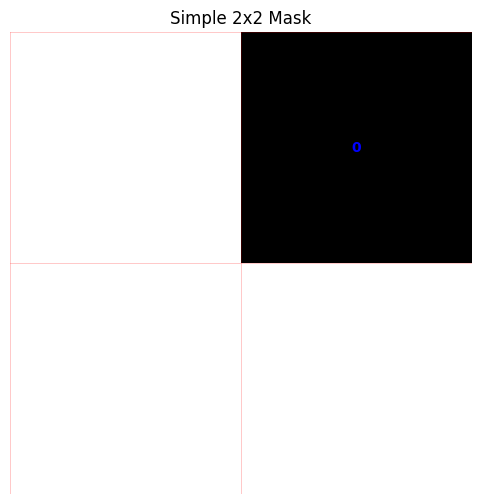

In [4]:
simple_mask = np.array([
    [1, 0],
    [1, 1]
])
print(f"Mask:\n{simple_mask}")
print(f"Flattened: {simple_mask.flatten()}")
print(f"RLE: '{rle_encode(simple_mask)}'")
visualize_mask(simple_mask, "Simple 2x2 Mask")

Mask visualization:
0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0
0 0 0 0 1 0 0 0 0
0 0 0 0 1 0 0 0 0
0 0 1 1 1 1 1 0 0
0 0 0 0 1 0 0 0 0
0 0 0 0 1 0 0 0 0
0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0
Flattened (first 20): 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
RLE: '23 1 32 1 39 5 50 1 59 1'


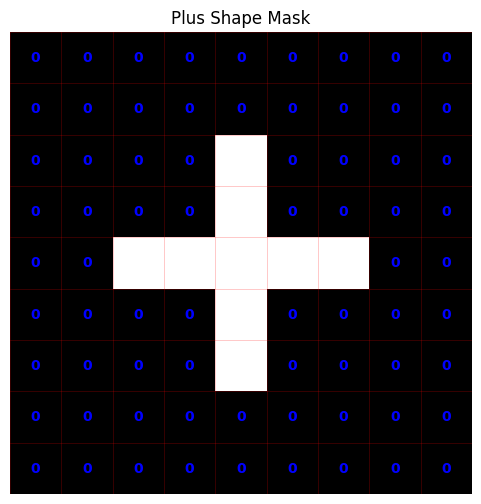

In [5]:
plus_mask = np.zeros((9, 9), dtype=np.uint8)
plus_mask[2:7, 4] = 1  # Vertical line
plus_mask[4, 2:7] = 1  # Horizontal line

print("Mask visualization:")
for i in range(9):
    print(' '.join(map(str, plus_mask[i])))

print(f"Flattened (first 20): {' '.join(map(str, plus_mask.flatten()[:20]))}...")
print(f"RLE: '{rle_encode(plus_mask)}'")
visualize_mask(plus_mask, "Plus Shape Mask")

Mask visualization:
0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0
0 0 1 1 1 1 1 0 0
0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0
RLE: '39 5'


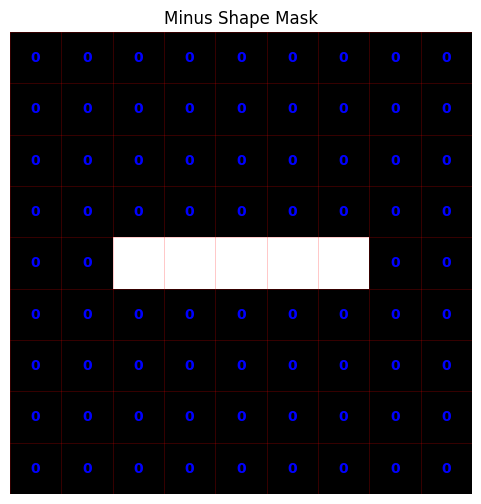

In [6]:
minus_mask = np.zeros((9, 9), dtype=np.uint8)
minus_mask[4, 2:7] = 1  # Horizontal line

print("Mask visualization:")
for i in range(9):
    print(' '.join(map(str, minus_mask[i])))

print(f"RLE: '{rle_encode(minus_mask)}'")
visualize_mask(minus_mask, "Minus Shape Mask")

In [7]:
test_mask = np.array([[1, 1, 0, 0, 1, 0]])
print(f"Test mask: {test_mask.flatten()}")

# Step by step explanation
pixels = test_mask.flatten()
print(f"1. Flatten: {pixels}")

padded = np.concatenate([[0], pixels, [0]])
print(f"2. Add borders: {padded}")

changes = np.where(padded[1:] != padded[:-1])[0] + 1
print(f"3. Find changes: {changes}")

runs = changes.copy()
runs[1::2] -= runs[::2]
print(f"4. Calculate lengths: {runs}")

result = ' '.join(str(x) for x in runs)
print(f"5. Final RLE: '{result}'")

Test mask: [1 1 0 0 1 0]
1. Flatten: [1 1 0 0 1 0]
2. Add borders: [0 1 1 0 0 1 0 0]
3. Find changes: [1 3 5 6]
4. Calculate lengths: [1 2 5 1]
5. Final RLE: '1 2 5 1'


<div style="
    background: linear-gradient(135deg, #1a1f2c 0%, #2d3748 50%, #4a5568 100%);
    border: 2px solid #63b3ed;
    border-radius: 15px;
    padding: 25px;
    margin: 20px 0;
    box-shadow: 0 0 30px rgba(99, 179, 237, 0.4),
                inset 0 0 20px rgba(255, 255, 255, 0.1);
    color: #f1f5f9;
    font-family: 'Segoe UI', system-ui, sans-serif;
    position: relative;
    overflow: hidden;
">

<div style="
    position: absolute;
    top: -20px;
    right: -20px;
    width: 100px;
    height: 100px;
    background: radial-gradient(circle, rgba(99, 179, 237, 0.25) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<div style="
    position: absolute;
    bottom: -40px;
    left: -40px;
    width: 120px;
    height: 120px;
    background: radial-gradient(circle, rgba(99, 179, 237, 0.2) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<h1 style="
    color: #63b3ed;
    margin: 0 0 20px 0;
    text-align: center;
    font-weight: 700;
    font-size: 1.8em;
    text-shadow: 0 0 15px rgba(99, 179, 237, 0.6);
    position: relative;
    z-index: 1;
">
    Create sumission models 2 Dino and ensemlbing
</h1>

In [8]:
import os
import cv2
import json
import math
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F

from PIL import Image
from pathlib import Path
from transformers import AutoImageProcessor, AutoModel

class CONFIG:
    test_images_path = "/kaggle/input/recodai-luc-scientific-image-forgery-detection/test_images"
    sample_sub_path = "/kaggle/input/recodai-luc-scientific-image-forgery-detection/sample_submission.csv"
    model1_path = "/kaggle/input/modelsbest309base/best_model.pth"
    model2_path = "/kaggle/input/dinobestmodel/pytorch/default/1/dino197.pth"
    dino_path = "/kaggle/input/dinov2/pytorch/base/1"
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    img_size = 512
    use_tta = True
    ensemble_strategy = "average"
    min_area = 150
    min_confidence = 0.33

2025-12-18 12:45:29.474665: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766061929.700529      20 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766061929.764497      20 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [9]:
class Decoder(nn.Module):
    
    def __init__(self, in_ch=768, out_ch=1):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(in_ch, 256, 3, padding=1), nn.ReLU(),
            nn.Conv2d(256, 64, 3, padding=1), nn.ReLU(),
            nn.Conv2d(64, out_ch, 1)
        )
    
    def forward(self, f, size):
        return self.net(F.interpolate(f, size=size, mode="bilinear", align_corners=False))

In [10]:
class DinoSegmenter(nn.Module):
    
    def __init__(self, encoder, processor):
        super().__init__()
        self.encoder = encoder
        self.processor = processor
        self.seg_head = Decoder(768, 1)
    
    def forward_features(self, x):
        imgs = (x*255).clamp(0, 255).byte().permute(0, 2, 3, 1).cpu().numpy()
        inputs = self.processor(images=list(imgs), return_tensors="pt").to(x.device)
        
        with torch.no_grad():
            feats = self.encoder(**inputs).last_hidden_state
        
        B, N, C = feats.shape
        fmap = feats[:, 1:, :].permute(0, 2, 1)
        
        s = int(math.sqrt(N-1))
        fmap = fmap.reshape(B, C, s, s)
        
        return fmap
    
    def forward_seg(self, x):
        fmap = self.forward_features(x)
        return self.seg_head(fmap, (CONFIG.img_size, CONFIG.img_size))

In [11]:
class Model(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1), nn.ReLU(),
            nn.Conv2d(32, 32, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2),
        )
        
        self.decoder = nn.Sequential(
            nn.Conv2d(64, 32, 3, padding=1), nn.ReLU(),
            nn.Upsample(scale_factor=2, mode='bilinear'),
            nn.Conv2d(32, 32, 3, padding=1), nn.ReLU(),
            nn.Upsample(scale_factor=2, mode='bilinear'),
            nn.Conv2d(32, 1, 1),
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        x = F.interpolate(x, size=(CONFIG.img_size, CONFIG.img_size), mode='bilinear', align_corners=False)
        
        return x

In [12]:
def load_model(model_path):
    try:
        checkpoint = torch.load(model_path, map_location=CONFIG.device)
        
        if isinstance(checkpoint, dict):
            state_dict = None
            if 'model_state_dict' in checkpoint:
                state_dict = checkpoint['model_state_dict']
            elif 'state_dict' in checkpoint:
                state_dict = checkpoint['state_dict']
            elif 'model' in checkpoint:
                model = checkpoint['model']
                if hasattr(model, 'eval'):
                    model.eval()
                return model.to(CONFIG.device)
            else:
                state_dict = checkpoint
            
            try:
                processor = AutoImageProcessor.from_pretrained(CONFIG.dino_path, local_files_only=True)
                encoder = AutoModel.from_pretrained(CONFIG.dino_path, local_files_only=True).eval().to(CONFIG.device)
                model = DinoSegmenter(encoder, processor).to(CONFIG.device)
                
                if state_dict is not None:
                    model.load_state_dict(state_dict, strict=False)
                
                model.eval()
                return model
            except:
                try:
                    model = Model().to(CONFIG.device)
                    if state_dict is not None:
                        model.load_state_dict(state_dict, strict=False)
                    model.eval()
                    return model
                except:
                    return None
        
        elif hasattr(checkpoint, 'eval'):
            checkpoint.eval()
            return checkpoint.to(CONFIG.device)
        
        return None
    except Exception as e:
        print(f"Error {Path(model_path).name}: {e}")
        return None

def predict_with_tta(model, image_tensor):
    predictions = []
    
    with torch.no_grad():
        if hasattr(model, 'forward_seg'):
            pred = torch.sigmoid(model.forward_seg(image_tensor))
        else:
            pred = torch.sigmoid(model(image_tensor))
    
    predictions.append(pred)
    
    with torch.no_grad():
        if hasattr(model, 'forward_seg'):
            pred = torch.sigmoid(model.forward_seg(torch.flip(image_tensor, dims=[3])))
        else:
            pred = torch.sigmoid(model(torch.flip(image_tensor, dims=[3])))
    
    predictions.append(torch.flip(pred, dims=[3]))
    
    with torch.no_grad():
        if hasattr(model, 'forward_seg'):
            pred = torch.sigmoid(model.forward_seg(torch.flip(image_tensor, dims=[2])))
        else:
            pred = torch.sigmoid(model(torch.flip(image_tensor, dims=[2])))
    
    predictions.append(torch.flip(pred, dims=[2]))
    
    if CONFIG.use_tta:
        with torch.no_grad():
            if hasattr(model, 'forward_seg'):
                pred = torch.sigmoid(model.forward_seg(torch.rot90(image_tensor, 1, [2, 3])))
            else:
                pred = torch.sigmoid(model(torch.rot90(image_tensor, 1, [2, 3])))
        
        predictions.append(torch.rot90(pred, -1, [2, 3]))
        
        return torch.stack(predictions).mean(0)[0, 0].detach().cpu().numpy()
    else:
        return predictions[0][0, 0].detach().cpu().numpy()

def postprocess(pred, original_size):
    pred = cv2.GaussianBlur(pred, (3, 3), 0)
    mean_val = np.mean(pred)
    std_val = np.std(pred)
    thr = mean_val + 0.3 * std_val
    mask = (pred > thr).astype(np.uint8)
    
    if mask.sum() > 0:
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, np.ones((5, 5), np.uint8))
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((3, 3), np.uint8))
    
    mask = cv2.resize(mask, original_size, interpolation=cv2.INTER_NEAREST)
    return mask

def rle_encode(mask):
    pixels = mask.T.flatten()
    dots = np.where(pixels == 1)[0]
    
    if len(dots) == 0:
        return "authentic"
    
    run_lengths = []
    prev = -2
    
    for b in dots:
        if b > prev + 1:
            run_lengths.extend((b + 1, 0))
        run_lengths[-1] += 1
        prev = b
    
    return json.dumps([int(x) for x in run_lengths])

In [13]:
model1 = load_model(CONFIG.model1_path)
model2 = load_model(CONFIG.model2_path)

models = {}
if model1:
    models['model1'] = model1
    print(f"model 1 success!")
if model2:
    models['model2'] = model2
    print(f"model 2 success!")


predictions = []
image_files = sorted([f for f in os.listdir(CONFIG.test_images_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp'))])

for image_name in image_files:
    image_path = Path(CONFIG.test_images_path) / image_name
    image = Image.open(image_path).convert("RGB")
    
    image_array = np.array(image.resize((CONFIG.img_size, CONFIG.img_size)), np.float32) / 255
    image_tensor = torch.from_numpy(image_array).permute(2, 0, 1)[None].to(CONFIG.device)
    
    ensemble_preds = []
    for model in models.values():
        pred = predict_with_tta(model, image_tensor)
        ensemble_preds.append(pred)
    
    if CONFIG.ensemble_strategy == "max" and ensemble_preds:
        final_pred = np.max(ensemble_preds, axis=0)
    else:
        final_pred = np.mean(ensemble_preds, axis=0) if ensemble_preds else np.zeros((CONFIG.img_size, CONFIG.img_size))
        
    mask = postprocess(final_pred, image.size)
    area = int(mask.sum())
    
    if area > 0:
        mask_resized = cv2.resize(mask, (CONFIG.img_size, CONFIG.img_size), interpolation=cv2.INTER_NEAREST)
        mean_inside = float(final_pred[mask_resized == 1].mean()) if (mask_resized == 1).any() else 0.0
    else:
        mean_inside = 0.0
        
    if area < CONFIG.min_area or mean_inside < CONFIG.min_confidence:
        annotation = "authentic"
    else:
        annotation = rle_encode(mask)
        
    predictions.append({
        "case_id": Path(image_name).stem,
        "annotation": annotation
    })
    
predictions_df = pd.DataFrame(predictions)
predictions_df["case_id"] = predictions_df["case_id"].astype(str)
    
submission = pd.read_csv(CONFIG.sample_sub_path)
submission["case_id"] = submission["case_id"].astype(str)
submission = submission[["case_id"]].merge(predictions_df[["case_id", "annotation"]], on="case_id", how="left")

submission["annotation"] = submission["annotation"].fillna("authentic")
submission[["case_id", "annotation"]].to_csv("submission.csv", index=False)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: T

model 1 success!
model 2 success!


<div style="
    background: linear-gradient(135deg, #1a1f2c 0%, #2d3748 50%, #4a5568 100%);
    border: 2px solid #63b3ed;
    border-radius: 15px;
    padding: 25px;
    margin: 20px 0;
    box-shadow: 0 0 30px rgba(99, 179, 237, 0.4),
                inset 0 0 20px rgba(255, 255, 255, 0.1);
    color: #f1f5f9;
    font-family: 'Segoe UI', system-ui, sans-serif;
    position: relative;
    overflow: hidden;
">

<div style="
    position: absolute;
    top: -20px;
    right: -20px;
    width: 100px;
    height: 100px;
    background: radial-gradient(circle, rgba(99, 179, 237, 0.25) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<div style="
    position: absolute;
    bottom: -40px;
    left: -40px;
    width: 120px;
    height: 120px;
    background: radial-gradient(circle, rgba(99, 179, 237, 0.2) 0%, transparent 70%);
    border-radius: 50%;
"></div>

<h1 style="
    color: #63b3ed;
    margin: 0 0 20px 0;
    text-align: center;
    font-weight: 700;
    font-size: 1.8em;
    text-shadow: 0 0 15px rgba(99, 179, 237, 0.6);
    position: relative;
    z-index: 1;
">
    If i have mistake write pls in comments
</h1>